In [1]:
# %pip install mne

In [24]:
#imports
# from google.colab import drive
import os
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from scipy.fft import fft, ifft
from scipy.signal import find_peaks
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import scipy.signal as signal
from scipy.signal import butter, sosfilt
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import cross_val_score
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV

In [3]:
#installs
# !pip install scipy
# !pip install mne


In [4]:
# mounting to google drive
# drive.mount('/content/drive')

In [5]:
# filePath = "/content/drive/My Drive/instruments_project2_colab_dataset/emotions.csv"
# data = pd.read_csv(filePath)

In [5]:
data = pd.read_csv("emotions.csv")

# Data Exploration





In [7]:
# Data Inspection
print(f"Shape: {data.shape}\n")
print(data.head())
print('\n' + '-'*50 + '\n')
uniqueValues = data['label'].unique()
print(f"classes: {uniqueValues}" )

Shape: (2132, 2549)

   # mean_0_a  mean_1_a  mean_2_a  mean_3_a  mean_4_a  mean_d_0_a  mean_d_1_a  \
0        4.62      30.3    -356.0      15.6      26.3       1.070       0.411   
1       28.80      33.1      32.0      25.8      22.8       6.550       1.680   
2        8.90      29.4    -416.0      16.7      23.7      79.900       3.360   
3       14.90      31.6    -143.0      19.8      24.3      -0.584      -0.284   
4       28.30      31.3      45.2      27.3      24.5      34.800      -5.790   

   mean_d_2_a  mean_d_3_a  mean_d_4_a  ...  fft_741_b  fft_742_b  fft_743_b  \
0      -15.70        2.06        3.15  ...       23.5       20.3       20.3   
1        2.88        3.83       -4.82  ...      -23.3      -21.8      -21.8   
2       90.20       89.90        2.03  ...      462.0     -233.0     -233.0   
3        8.82        2.30       -1.97  ...      299.0     -243.0     -243.0   
4        3.06       41.40        5.52  ...       12.0       38.1       38.1   

   fft_744_b  fft

In [8]:
# Data Summary
print(f"information: {data.info()}\n")
print('\n' + '-'*50 + '\n')
print(f"description: {data.describe()}\n")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2132 entries, 0 to 2131
Columns: 2549 entries, # mean_0_a to label
dtypes: float64(2548), object(1)
memory usage: 41.5+ MB
information: None


--------------------------------------------------

description:         # mean_0_a     mean_1_a     mean_2_a     mean_3_a     mean_4_a  \
count  2132.000000  2132.000000  2132.000000  2132.000000  2132.000000   
mean     15.256914    27.012462  -104.975629    13.605898    24.150483   
std      15.284621     9.265141   206.271960    16.874676    14.187340   
min     -61.300000  -114.000000  -970.000000  -137.000000  -217.000000   
25%       6.577500    26.075000  -195.000000     4.857500    23.600000   
50%      14.100000    30.000000    14.950000    15.400000    25.200000   
75%      27.700000    31.400000    29.600000    26.500000    26.800000   
max     304.000000    42.300000   661.000000   206.000000   213.000000   

        mean_d_0_a   mean_d_1_a   mean_d_2_a   mean_d_3_a   mean_d_4_a  ...

## Data Cleaning


In [9]:
# Data Cleaning
missingValues = data.isnull().sum()
print(f"Missing values: {missingValues}")
print('\n' + '-'*50 + '\n')
duplicates = data[data.duplicated(keep=False)]
print(f"Duplicated values: {duplicates}")

Missing values: # mean_0_a    0
mean_1_a      0
mean_2_a      0
mean_3_a      0
mean_4_a      0
             ..
fft_746_b     0
fft_747_b     0
fft_748_b     0
fft_749_b     0
label         0
Length: 2549, dtype: int64

--------------------------------------------------

Duplicated values: Empty DataFrame
Columns: [# mean_0_a, mean_1_a, mean_2_a, mean_3_a, mean_4_a, mean_d_0_a, mean_d_1_a, mean_d_2_a, mean_d_3_a, mean_d_4_a, mean_d_0_a2, mean_d_1_a2, mean_d_2_a2, mean_d_3_a2, mean_d_4_a2, mean_d_5_a, mean_d_6_a, mean_d_7_a, mean_d_8_a, mean_d_9_a, mean_d_10_a, mean_d_11_a, mean_d_12_a, mean_d_13_a, mean_d_14_a, mean_d_15_a, mean_d_16_a, mean_d_17_a, mean_d_18_a, mean_d_19_a, mean_d_20_a, mean_d_21_a, mean_d_22_a, mean_d_23_a, mean_d_24_a, mean_d_25_a, mean_d_26_a, mean_d_27_a, mean_d_28_a, mean_d_29_a, mean_d_30_a, mean_d_31_a, mean_d_32_a, mean_d_33_a, mean_d_34_a, mean_d_35_a, mean_d_36_a, mean_d_37_a, mean_d_38_a, mean_d_39_a, mean_d_40_a, mean_d_41_a, mean_d_42_a, mean_d_43_a, mean

#Data visualization [[[FEL AKHER]]]


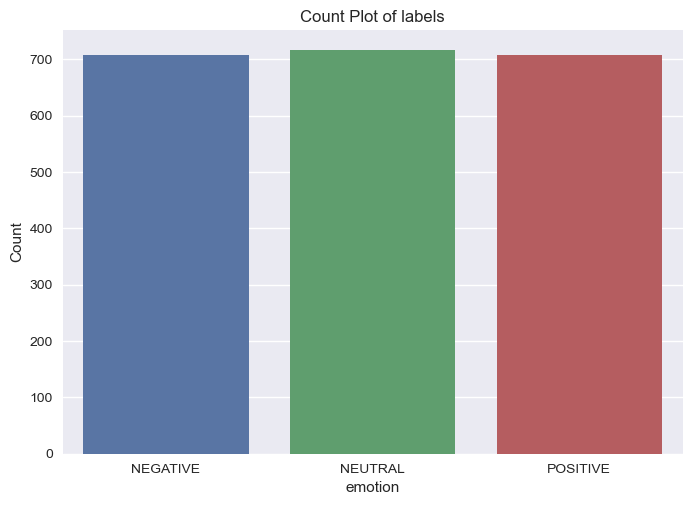

In [63]:
# Count Plots
plt.style.use('seaborn')
sns.countplot(x='label', data=data)
plt.title('Count Plot of labels')
plt.xlabel('emotion')
plt.ylabel('Count')
plt.show()

In [35]:
# Selecting the frequency domain features of the data
sample_b = data.loc[0, 'fft_0_b':'fft_749_b']

# Selecting the frequency domain features of the data
sample_a = data.loc[0, 'fft_0_a':'fft_749_a']

In [43]:
def plot_eeg_signal(signal, title, x_label, y_label, color='red'):
    plt.style.use('seaborn')
    plt.figure(figsize=(15, 10))
    plt.plot(range(len(signal)), signal)
    plt.title(title, weight='bold', color=color)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.show()

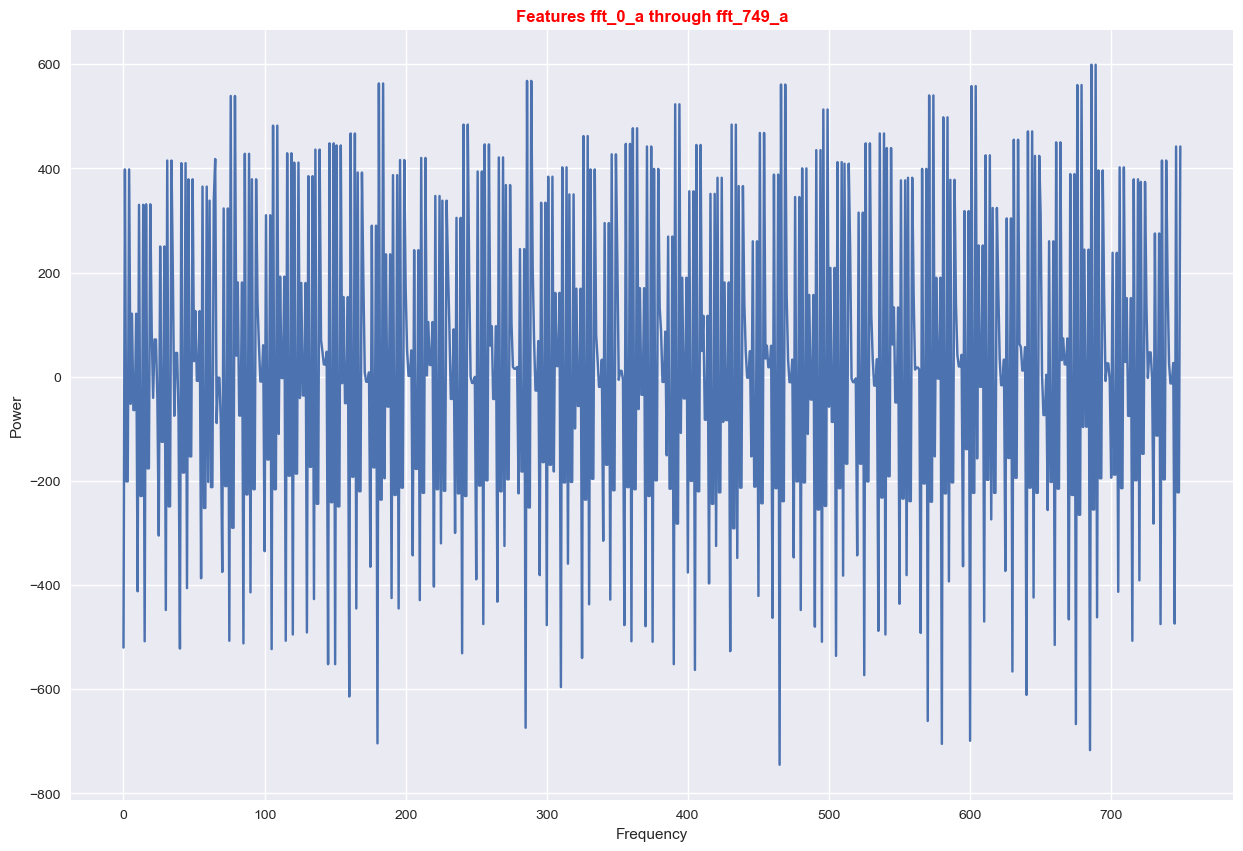

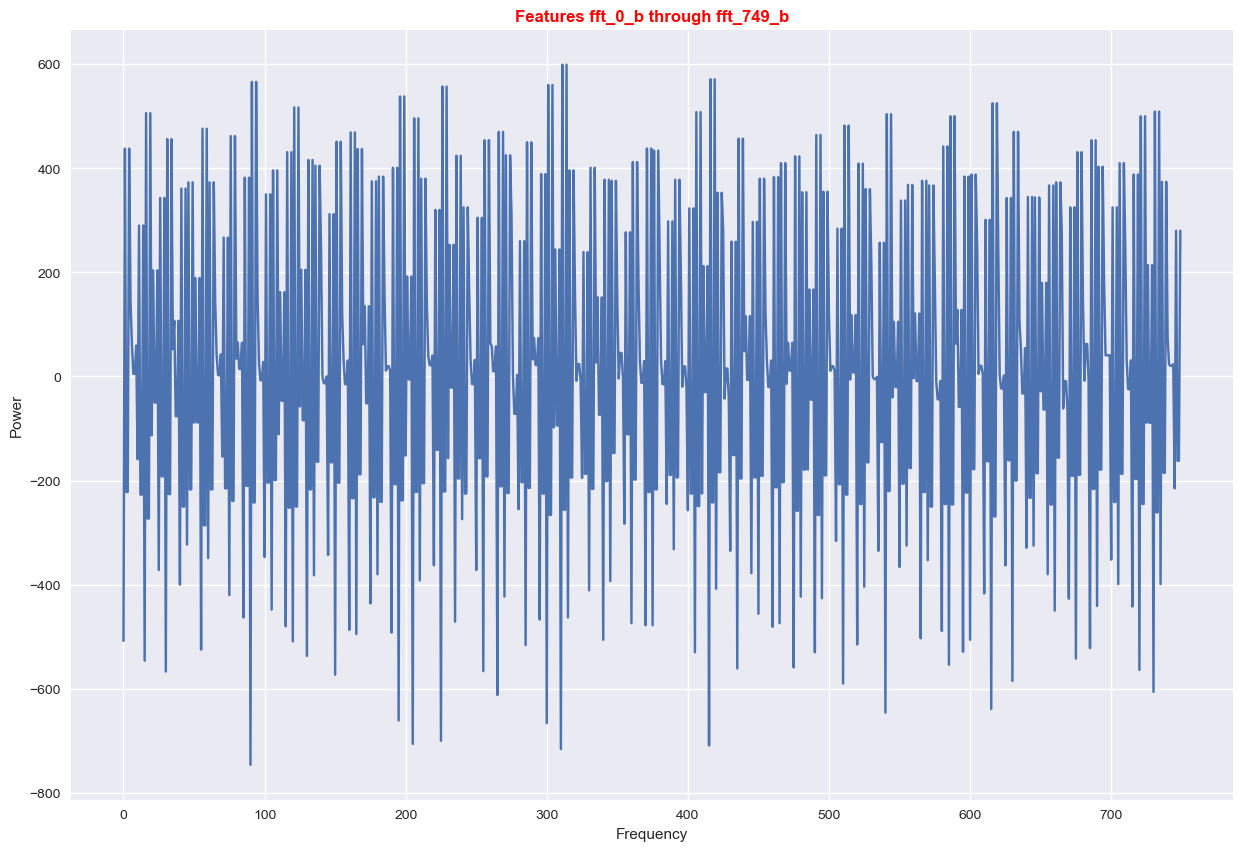

In [44]:
plot_eeg_signal(sample_a, "Features fft_0_a through fft_749_a", "Frequency", "Power")
plot_eeg_signal(sample_b, "Features fft_0_b through fft_749_b", "Frequency", "Power")

In [11]:
def extract_sample(data, label, index, column_start, column_end):
    filtered_data = data.loc[data["label"] == label]
    sample = filtered_data.loc[index][column_start:column_end]
    return sample

In [12]:
negative_sample_b = extract_sample(data, "NEGATIVE", 0, 'fft_0_b', 'fft_749_b')
neutral_sample_b = extract_sample(data, "NEUTRAL", 1, 'fft_0_b', 'fft_749_b')
positive_sample_b = extract_sample(data, "POSITIVE", 2, 'fft_0_b', 'fft_749_b')

In [89]:
negative_sample_a = extract_sample(data, "NEGATIVE", 0, 'fft_0_a', 'fft_749_a')
neutral_sample_a = extract_sample(data, "NEUTRAL", 1, 'fft_0_a', 'fft_749_a')
positive_sample_a = extract_sample(data, "POSITIVE", 2, 'fft_0_a', 'fft_749_a')

In [13]:
# Separating Positive, Negative and Neutral dataframes for plortting
positive = data.loc[data["label"]=="POSITIVE"]
sample_positive = positive.loc[2, 'fft_0_b':'fft_749_b']
negative = data.loc[data["label"]=="NEGATIVE"]
sample_negative = negative.loc[0, 'fft_0_b':'fft_749_b']
neutral = data.loc[data["label"]=="NEUTRAL"]
sample_neutral = neutral.loc[1, 'fft_0_b':'fft_749_b']

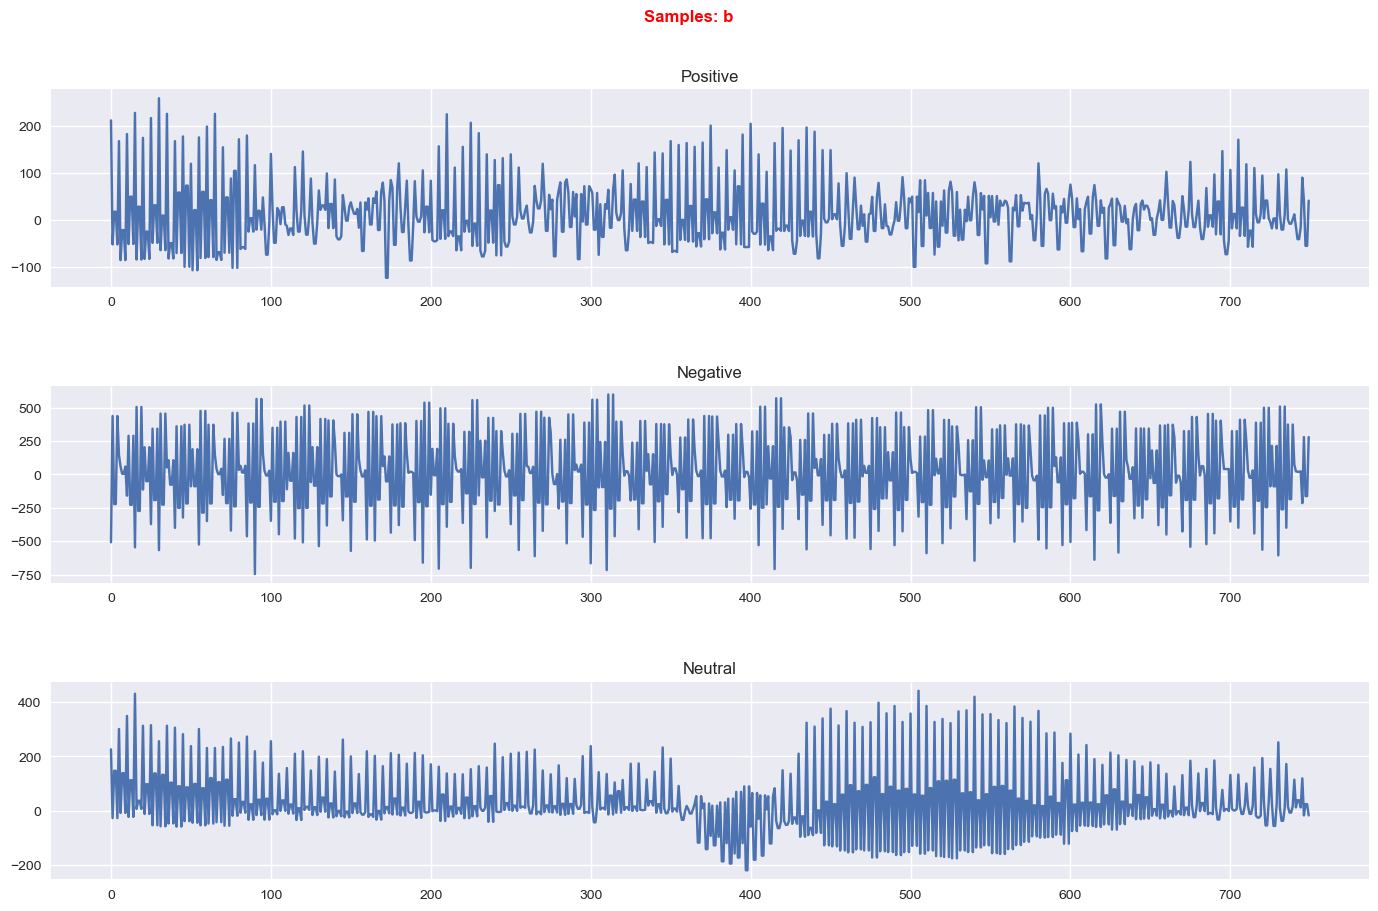

In [54]:

plt.style.use('seaborn')
fig, axs = plt.subplots(3, figsize=(17, 10))
fig.subplots_adjust(top=0.9, hspace=0.5)

axs[0].plot(range(len(positive_sample_b)), positive_sample_b)
axs[0].set_title('Positive')

axs[1].plot(range(len(negative_sample_b)), negative_sample_b)
axs[1].set_title('Negative')

axs[2].plot(range(len(neutral_sample_b)), neutral_sample_b)
axs[2].set_title('Neutral')

# Set the title for the entire figure
fig.suptitle('Samples: b', weight='bold', color='red')
plt.show()

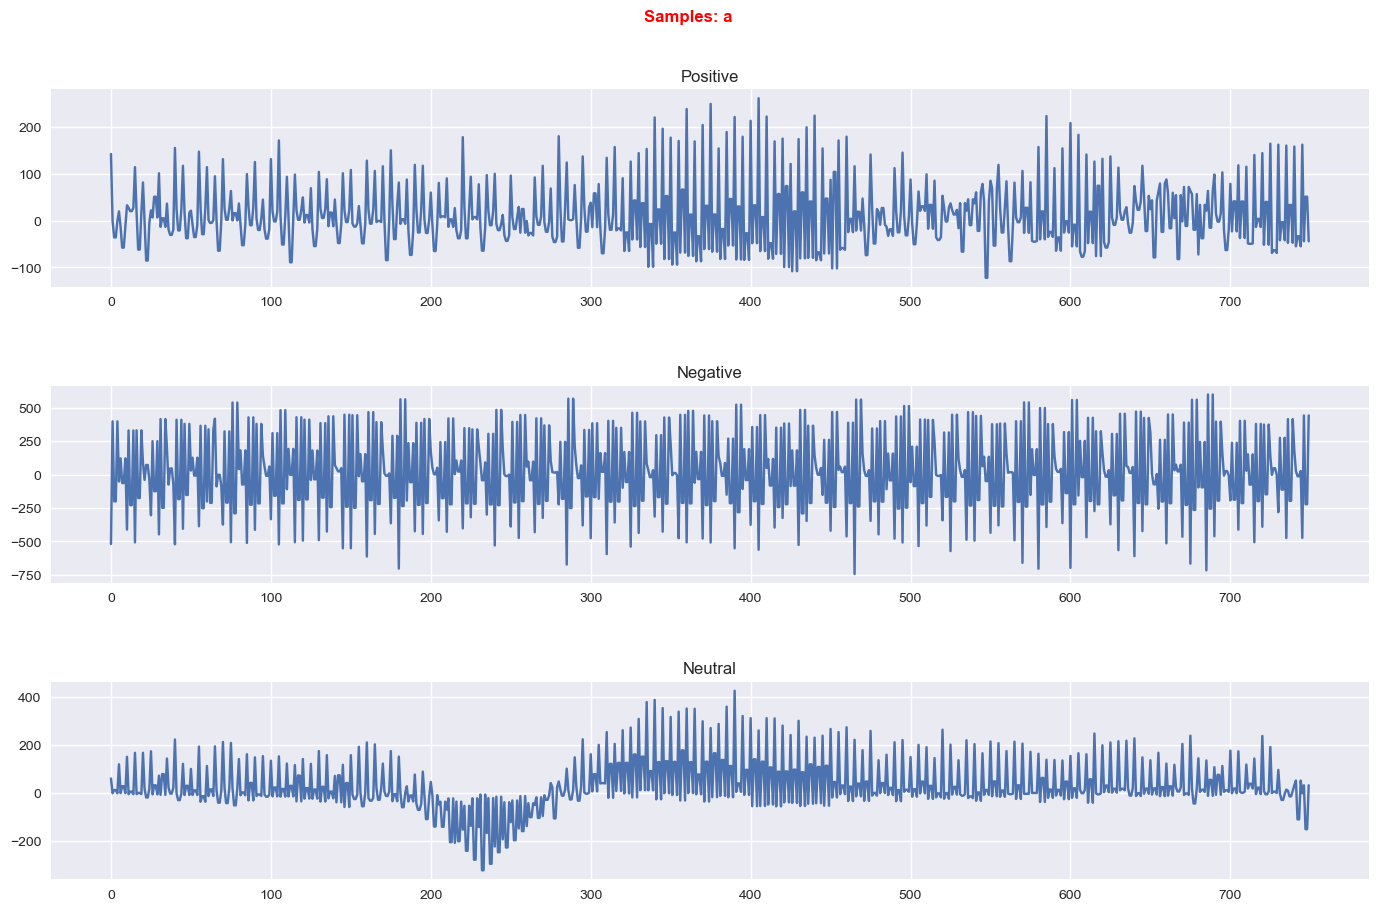

In [56]:
plt.style.use('seaborn')
fig, axs = plt.subplots(3, figsize=(17, 10))
fig.subplots_adjust(top=0.9, hspace=0.5)

axs[0].plot(range(len(positive_sample_a)), positive_sample_a)
axs[0].set_title('Positive')

axs[1].plot(range(len(negative_sample_a)), negative_sample_a)
axs[1].set_title('Negative')

axs[2].plot(range(len(neutral_sample_a)), neutral_sample_a)
axs[2].set_title('Neutral')

# Set the title for the entire figure
fig.suptitle('Samples: a', weight='bold', color='red')
plt.show()

<AxesSubplot:>

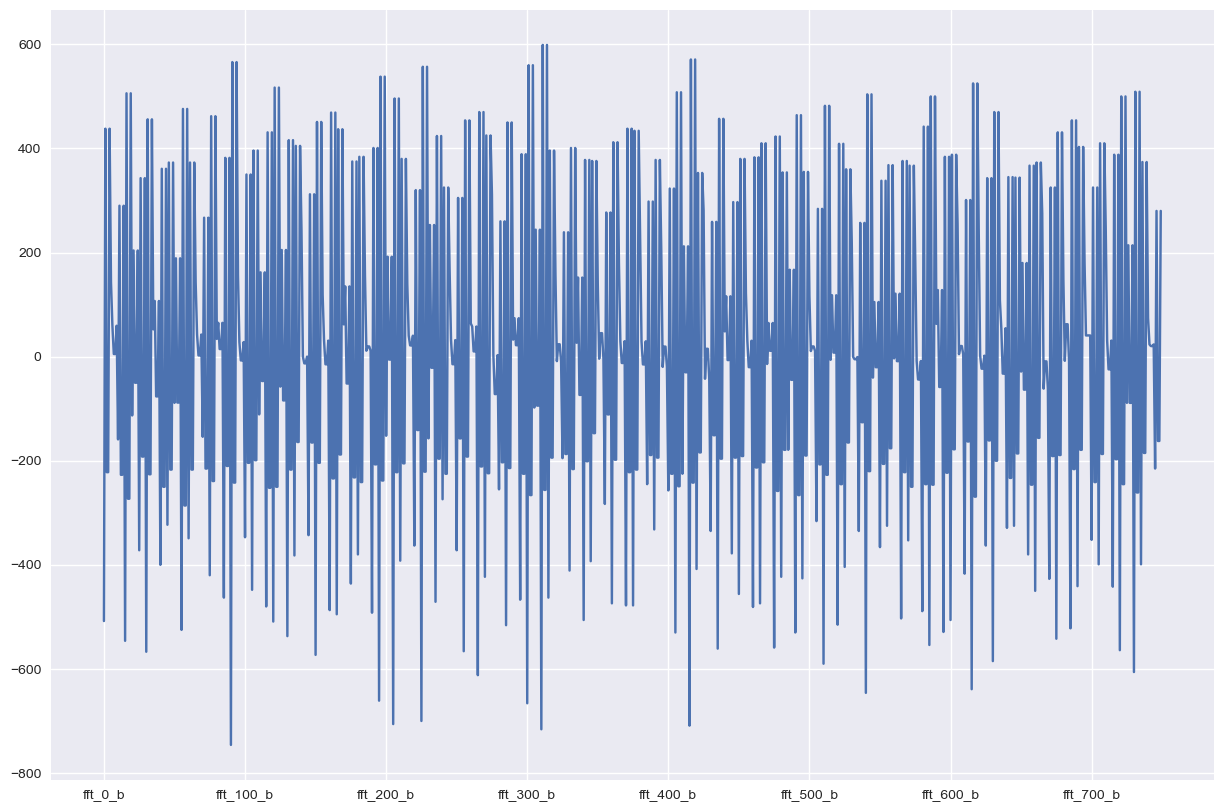

In [15]:
# Ploting data in time domain
fft_data = data.loc[:,'fft_0_b':'fft_749_b']
fft_data
fft_data.iloc[0,:].plot(figsize=(15,10))

# Data Preprocessing


## Emotions Filters


* positive emotions correspond to frequencies between 8-12 Hz (alpha band)
* negative emotions are in the 4-8 Hz (theta band)
* neutral emotions in the 12-30 Hz (beta and gamma bands).

In [17]:
# Butterworth filter
def butter_bandpass(lowcut, highcut, fs, order=5):
        nyq = 0.5 * fs
        low = lowcut / nyq
        high = highcut / nyq
        sos = butter(order, [low, high], analog=False, btype='band', output='sos')
        return sos

def butter_bandpass_filter(data, lowcut, highcut, fs, order=5):
        sos = butter_bandpass(lowcut, highcut, fs, order=order)
        y = sosfilt(sos, data)
        return y

In [18]:
# filtering Positive emotions
lowcut_positive = 8
highcut_positive = 12
fs = 50 # gad3ana meni
filtered_positive_data = butter_bandpass_filter(positive_sample_b, lowcut_positive, highcut_positive, fs)

In [19]:
# filtering Negative emotions
lowcut_negative = 2
highcut_negative = 8
fs = 30 # gad3ana meni
filtered_negative_data = butter_bandpass_filter(negative_sample_b, lowcut_negative, highcut_negative, fs)

In [20]:
# filtering Neutral emotions
lowcut_neutral = 2
highcut_neutral = 8
fs = 50 # gad3ana meni
filtered_neutral_data = butter_bandpass_filter(neutral_sample_b, lowcut_neutral, highcut_neutral, fs)

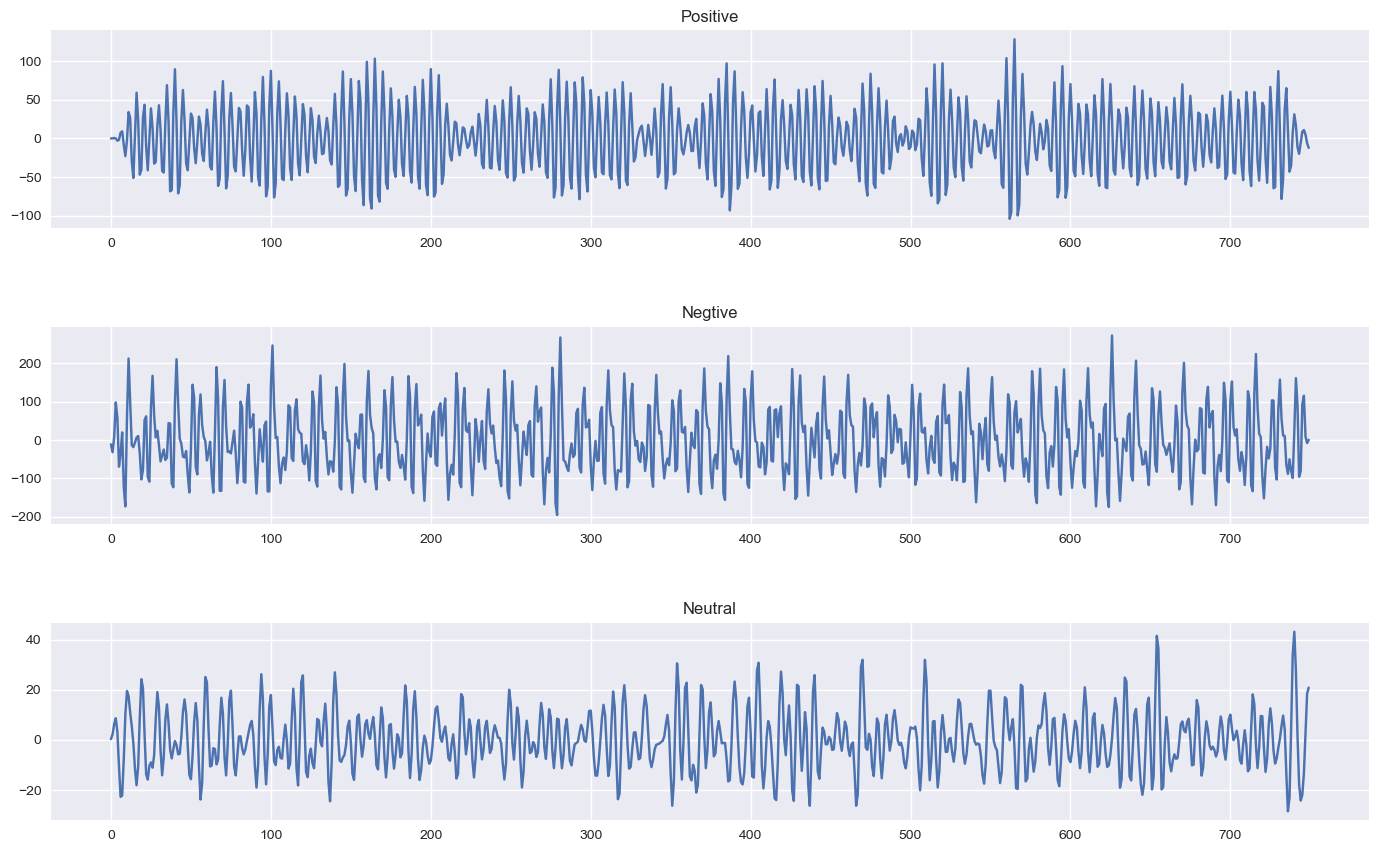

In [21]:
# Plotting each of positive, negative, and neutral after filter
plt.style.use('seaborn')
fig, axs = plt.subplots(3, figsize=(17, 10))
fig.subplots_adjust(top=0.9, hspace=0.5)
axs[0].plot(range(len(filtered_positive_data)), filtered_positive_data)
axs[0].set_title('Positive')
axs[1].plot(range(len(filtered_negative_data)), filtered_negative_data)
axs[1].set_title('Negtive')
axs[2].plot(range(len(filtered_neutral_data)), filtered_neutral_data)
axs[2].set_title('Neutral')
plt.show()

# Model Preparations


## Seperating Target from Data

In [6]:
# Splitting the Data
y = data['label']
X = data.drop(['label'], axis=1)

In [7]:
# scaling the data
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X))

The standard score of a sample x is calculated as:

z = (x - u) / s </b></span>

In [116]:
X

,0,1,2,3,4,5,6,7,8,9,...,2538,2539,2540,2541,2542,2543,2544,2545,2546,2547
0,-0.696086,0.354912,-1.217244,0.118199,0.151545,0.058107,0.042167,-0.235032,0.118970,0.161980,...,0.326344,-0.383307,0.644530,0.644530,-0.383307,-0.740515,0.910153,-1.060843,-1.060843,0.910153
1,0.886267,0.657191,0.664209,0.722797,-0.095212,0.362931,0.191335,0.037871,0.223051,-0.259024,...,0.513279,-0.603560,0.269086,0.269086,-0.603560,0.672424,-0.455506,0.164015,0.164015,-0.455506
2,-0.416000,0.257751,-1.508190,0.183401,-0.031760,4.443013,0.388815,1.320424,5.284193,0.102818,...,-1.715175,1.680389,-1.614376,-1.614376,1.680389,-0.925585,0.915075,-0.929340,-0.929340,0.915075
3,-0.023357,0.495256,-0.184384,0.367151,0.010541,-0.033897,-0.039529,0.125117,0.133083,-0.108477,...,-0.537182,0.913268,-1.703555,-1.703555,0.913268,0.494472,-0.529197,0.550352,0.550352,-0.529197
4,0.853547,0.462869,0.728218,0.811708,0.024642,1.934333,-0.686747,0.040514,2.432265,0.287172,...,0.459582,-0.437429,0.803268,0.803268,-0.437429,0.448205,-0.554794,0.685331,0.685331,-0.554794
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2127,1.121854,0.560030,0.665179,1.019168,-0.052910,0.089813,-0.244768,0.005072,-0.009279,-0.062520,...,0.597182,-0.596030,0.465440,0.465440,-0.596030,0.363500,-0.566116,0.904190,0.904190,-0.566116
2128,0.068260,0.462869,-0.868108,0.041142,-0.017660,0.232213,0.121981,0.061078,0.275385,0.345806,...,-2.141400,2.301616,-2.425906,-2.425906,2.301616,-0.101667,0.230843,-0.100870,-0.100870,0.230843
2129,-1.034217,0.138998,-0.746881,0.130054,0.179746,0.503662,0.804934,0.182107,0.117206,0.240687,...,-0.701631,1.247413,-0.963369,-0.963369,1.247413,1.476767,-1.300066,0.362209,0.362209,-1.300066
2130,0.100980,-0.767838,-0.887505,-0.312132,0.130394,0.135425,0.179580,-0.239438,0.097213,0.245969,...,-0.257618,0.089673,0.217362,0.217362,0.089673,-2.310051,2.249083,-2.084689,-2.084689,2.249083


## Target Encoding

Encoding:
* Neutral --> 0
* Negative --> 1
* Positive --> 2

In [8]:
# Create an instance of OneHotEncoder
encoder = OneHotEncoder(sparse=False)
y = encoder.fit_transform(np.array(y).reshape(-1, 1))
y

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       ...,
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.]])

## Splitting the data for training and Testing

splitting the data
* 80% for training
* 20% for the test .

In [9]:
X_train,X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8)

# Modeling

## MLP Classifier

In [36]:
# Create an MLP classifier
mlp_classifier = MLPClassifier()

# Define a parameter grid to search through
param_grid = {
    'hidden_layer_sizes': [(128, 128), (64, 64), (32, 32)],
    'alpha': [1e-5, 1e-4, 1e-3],
    'max_iter': [500, 1000, 1500],
}

# Perform a grid search with cross-validation (e.g., 5-fold cross-validation)
grid_search = GridSearchCV(mlp_classifier, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the grid search to the data
grid_search.fit(X, y)

# Get the best combination of hyperparameters
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Hyperparameters:", best_params)
print("Best Cross-Validation Accuracy:", best_score)

Best Hyperparameters: {'alpha': 0.0001, 'hidden_layer_sizes': (128, 128), 'max_iter': 500}
Best Cross-Validation Accuracy: 0.9732680234411936


In [35]:
from sklearn.model_selection import cross_val_predict

# Create an MLP classifier (you can customize it with the desired parameters)
mlp_classifier = MLPClassifier(solver='adam', alpha=0.0001, hidden_layer_sizes=(128, 128), random_state=42, max_iter=500)

# Perform 5-fold cross-validation (you can change the 'cv' parameter for a different number of folds)
y_pred = cross_val_predict(mlp_classifier, X, y, cv=5)

# Calculate accuracy
accuracy = accuracy_score(y, y_pred)
print("Accuracy:", accuracy)

# Calculate and display a classification report for the cross-validated predictions
classification_rep = classification_report(y, y_pred, target_names={"Neutral","Positive","Negative"})
print("Classification Report:\n", classification_rep)


Accuracy: 0.9709193245778611
Classification Report:
               precision    recall  f1-score   support

    Positive       0.97      0.99      0.98       708
    Negative       0.98      0.98      0.98       716
     Neutral       0.97      0.95      0.96       708

   micro avg       0.97      0.97      0.97      2132
   macro avg       0.97      0.97      0.97      2132
weighted avg       0.97      0.97      0.97      2132
 samples avg       0.97      0.97      0.97      2132



c:\Users\zero\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
